## Modeling part
From Correlation and correlation visulalosation part, features has been recieved and now it is time to train many models and try to predict house price index

First of all, all needed categories has to be defined and recieved it's values from cleaned dataset.
Of cource, all imports have to be defined at first.

### Imports

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Categories

In [2]:
categories = ['house_price_index', 'population_by_education', 'resource_productivity',
       'taxes_revenues', 'income', 'e_tech', 'human_science', 'crime_area',
       'broadband_households', 'unemployment']

### File reading

In [3]:
#file reading
data = pd.read_csv('data/summed.csv')
#dataset with only nessesary values nad remove empty rows 
cat_data = data[categories].dropna()

Next step is divide cleaned data set to test and train datasets

In [4]:
X = cat_data.drop(['house_price_index'], axis=1)

In [5]:
y = cat_data['house_price_index']
X = cat_data.drop(['house_price_index'], axis=1)


### Models
#### Model 1
First model is GaussianNB with integer numbers of categorical indexes and house price index.
It was choosen by ability to work with negative integers

Validation data is **10%**

In [6]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,np.asarray(y).astype('int'), test_size=0.10, random_state=1)
model1 = GaussianNB()
model1.fit(X_train_1, y_train_1)

GaussianNB()

In [23]:
model_s1 = accuracy_score(model1.predict(X_test_1),np.asarray(y_test_1).astype('int'))

The result of first model is very bad, but it was expected because dataset is to small for number prediction.

#### Model 2
Second model is GaussianNB, but at this time all values are integers (categories and house price index).

Validation data is **10%**

In [8]:
X_train_2, X_test_2, y_train_2, y_test_2 =  train_test_split(X.astype('int'),np.asarray(y).astype('int'), test_size=0.10, random_state=1)
model2 = GaussianNB()
model2.fit(X_train_2, y_train_2)

GaussianNB()

In [22]:
model_s2 = accuracy_score(model2.predict(X_test_2),np.asarray(y_test_2).astype('int'))

The result of model 2 is better than result of model 1, but it also bad

#### Model 3
Third model is Random Forest Classifier. Here is used categorical house_price_index where -inf to 0 is **0**, from 0 to 10 is **1** and from 10 to inf is **2**. Also, categories are integer numbers as in Model 2.

So model predicts range, where could be house_price_index value. 

Validation data is **20%**

In [10]:
y_2 = y.to_frame()

c = pd.cut(
    y_2.stack(),
    [-np.inf, 0, 10, np.inf],
    labels=[0, 1, 2]
)
y_2 = y_2.join(c.unstack().add_suffix('_cat')).drop(['house_price_index'], axis=1).values.ravel()

In [11]:
y_2

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [12]:
X_train_3, X_test_3, y_train_3, y_test_3 =  train_test_split(X.astype('int'),y_2, test_size=0.20, random_state=1)

model3 = RandomForestClassifier(max_depth=2, random_state=0)
model3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
model_s3 = accuracy_score(model3.predict(X_test_3), y_test_3)

The result was expected, because categorical values have range.

#### Model 4
Fouth model is Random Forest Classifier. Here is used categorical house_price_index where -inf to 0 is **0**, from 0 to 10 is **1** and from 10 to inf is **2**. However, all categories are categorical because were rounded and converted to int values and then converter using get_dummies.

So model predicts range, where could be house_price_index value. 

Validation data is **20%**

In [14]:
X_train_4, X_test_4, y_train_4, y_test_4 =  train_test_split(pd.get_dummies(data=X.round(0).astype('int'), columns=categories[1:]),y_2, test_size=0.20, random_state=1)

model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train_4, y_train_4)

RandomForestClassifier(random_state=0)

In [20]:
model_s4 = accuracy_score(model4.predict(X_test_4), y_test_4)

#### DEMO


Here is demo to predict 2018 year house price index in Estonia  range with best model - model 3

In [16]:
categories[1:]

['population_by_education',
 'resource_productivity',
 'taxes_revenues',
 'income',
 'e_tech',
 'human_science',
 'crime_area',
 'broadband_households',
 'unemployment']

In [17]:
pupulation_by_education = 1
resouce_productivity =  1
taxes_revenues = 1
income = 1
e_tech = 1
human_science = 1
crime_area = 0
broadband_households = 1
unemployment = 1

demo =  pd.DataFrame(np.array([[pupulation_by_education, resouce_productivity, taxes_revenues, income, e_tech, human_science, crime_area, broadband_households, unemployment ]]),columns=categories[1:])

In [18]:
model3.predict(demo)

array([1])

The result has shown 1 => it means growth in range from 0 to 10 was in 2018 in Estonia

#### Results
Best model was model 3

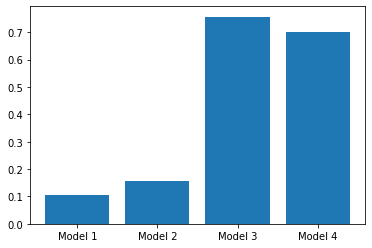

In [27]:
fig, ax = plt.subplots()
x = np.arange(4)
plt.bar(x, [model_s1, model_s2, model_s3, model_s4])
plt.xticks(x, ('Model 1', 'Model 2', 'Model 3', 'Model 4'))
plt.show()